### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables - CUDA Quantum

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian, and plots the expectation value and execution time over the number of qubits in the problem.


In [1]:
%reload_ext autoreload
%autoreload 2

### Application and Execution Settings
Configure and run the cell below with the desired execution settings. Then configure and run the remaining cell(s), each one a variation of this benchmark.

In [2]:
# Benchmark application settings
app_args = dict(
    min_qubits = 4,
    max_qubits = 24,
    skip_qubits = 1,
    max_circuits = 1,
    
    # total shots allocation, by default evenly divided among all executions at one qubit size
    num_shots = 10000,

    # this notebook executes observable benchmarks
    method = 4,
    do_observables = True,
    
    # execute by distributing num_shots weighted by term coefficients (N/A for cudaq)
    distribute_shots = False,
    
    # number of Trotter steps and total evolution time
    K = 1,
    t = 0.1,
    
    # initial state can be "checkerboard", "ghz", or bitstring of 0s and 1s
    init_state = "checkerboard",

    # "SpinOperator" is the default option for CUDA Q
    # None or "simple" can be slow for K > 0
    group_method = "SpinOperator",    # method to generate commuting groups
                                      # None, "simple", or "SpinOperator"
     
    # which API to use for execution, "qiskit" or "cudaq"
    api = "cudaq",
)

# Default execution settings
exec_args = dict(
    hub="", group="", project="",
    provider_backend = None,
    
    backend_id="nvidia",

    exec_options = {},
)

### Imports for Debugging Options
These may be removed later, but during development they are convenient.

In [3]:
# Configure benchmark library modules (for debugging)
import sys
sys.path.insert(1, "..")
sys.path.insert(1, "../_common/cudaq")
sys.path.insert(1, "cudaq")

import execute
execute.verbose = False
execute.verbose_time = False

# ... access to HamLib datasets
import hamlib._common.hamlib_utils as hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

#####################
# use re-ordered list from Spin Operator for Trotter circuit creation (default = True)
hamlib_simulation_kernel.use_commuting_terms = True

# place resulting data and images into a folder with "test" suffix
import _common.metrics
#metrics.data_suffix = "_paper"
#hamlib_simulation_benchmark.data_suffix = "_paper"

# control the max number of qubits for which to compute exact answer
hamlib_simulation_benchmark.max_qubits_exact = 16


### Hamiltonian Simulation - Transverse Field Ising Model


 cannot import name 'QuantumCircuit' from 'qiskit' (unknown location)
Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = condensedmatter/tfim/tfim, {'1D-grid': 'pbc', 'h': 2}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:17 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 8
... quantum execution time = 0.18
... exact computation time = 0.005 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -4.3934
    ==> Simulation Quality: 1.098

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 10
... quantum execution time = 0.003
... exact computation time = 0.009 sec

    Exact expectation value, computed classically

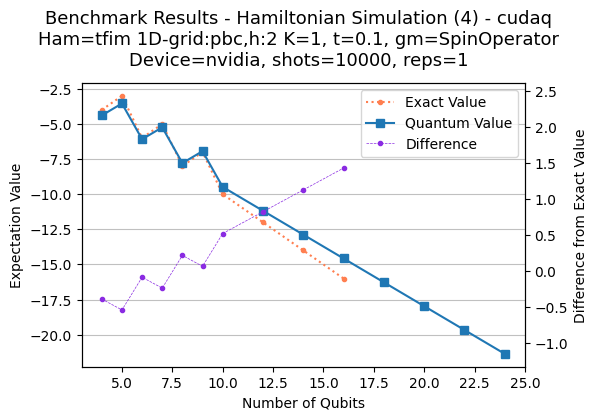

----- Expectation Time Plot -----


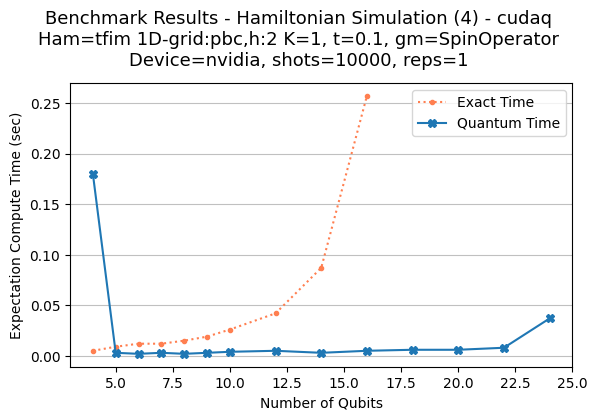

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = condensedmatter/heisenberg/heis, {'1D-grid': 'pbc', 'h': 2}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:23 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
... quantum execution time = 0.079
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -4.9876
    ==> Simulation Quality: 1.247

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 20
... quantum execution time = 0.002
... exact computation time = 0.011 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm

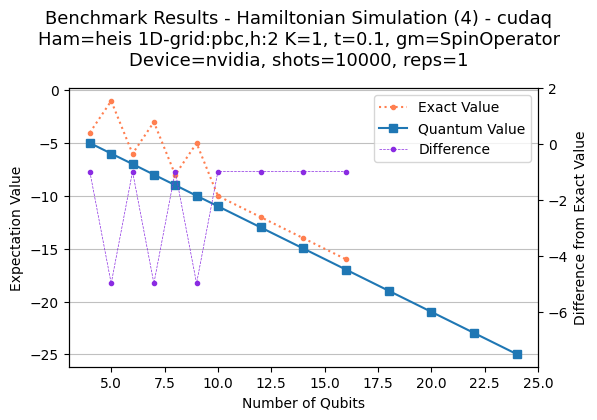

----- Expectation Time Plot -----


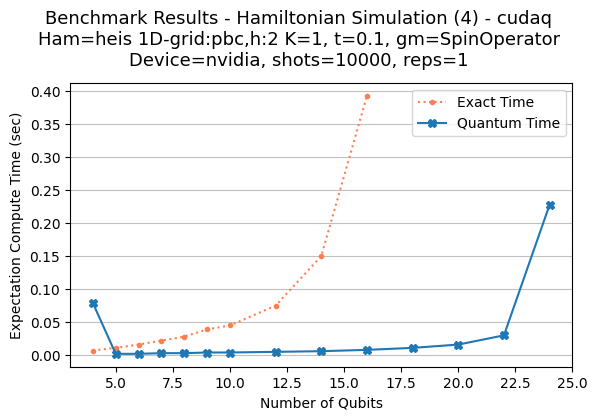

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = condensedmatter/fermihubbard/FH_D-1, {'1D-grid': 'pbc', 'enc': 'bk', 'U': 12}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:25 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... number of terms in Hamiltonian = 11
... quantum execution time = 0.071
... exact computation time = 0.005 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: -0.9896
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... number of terms in Hamiltonian = 22
... quantum execution time = 0.002
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: -0.0
    Estimated exp

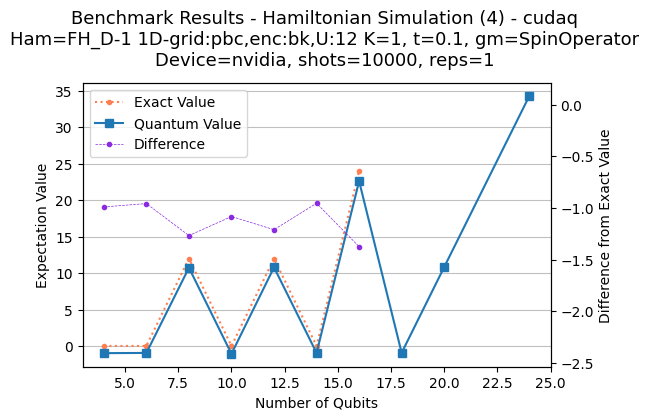

----- Expectation Time Plot -----


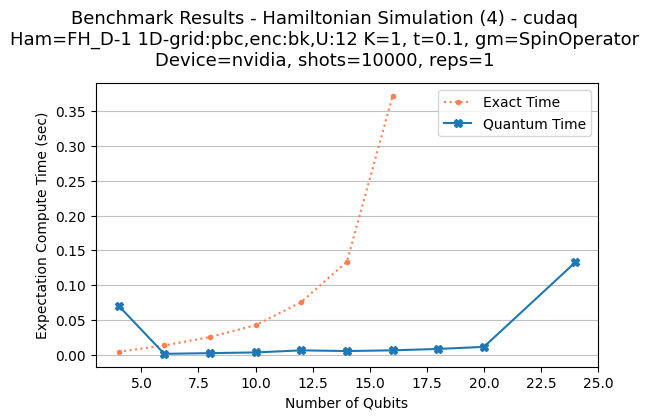

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = condensedmatter/bosehubbard/BH_D-1_d-4, {'1D-grid': 'nonpbc', 'enc': 'gray', 'U': 10}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:29 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 39
... quantum execution time = 0.08
... exact computation time = 0.016 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 58.9823
    ==> Simulation Quality: 0.983

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 74
... quantum execution time = 0.008
... exact computation time = 0.046 sec

    Exact expectation value, computed classica

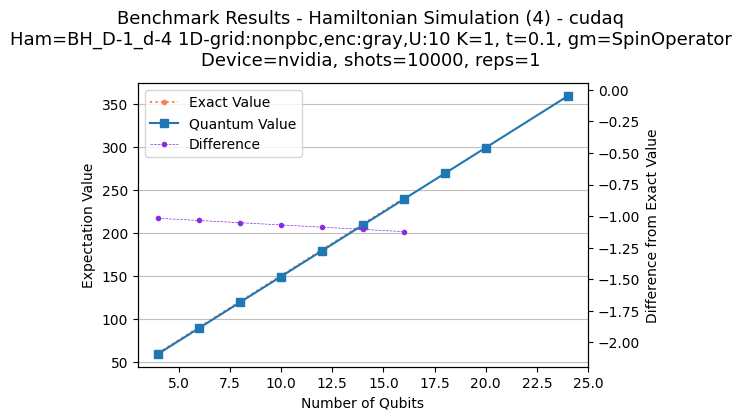

----- Expectation Time Plot -----


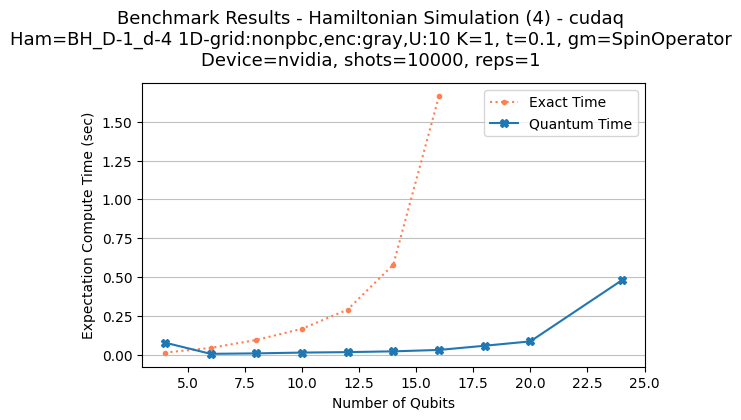

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - Random Max3Sat


Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = binaryoptimization/max3sat/random/random_max3sat-hams, {'ratio': '2', 'rinst': '02'}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:35 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... number of terms in Hamiltonian = 12
... quantum execution time = 0.1
... exact computation time = 0.006 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 6.0
    ==> Simulation Quality: 0.857

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... number of terms in Hamiltonian = 17
... quantum execution time = 0.002
... exact computation time = 0.01 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 

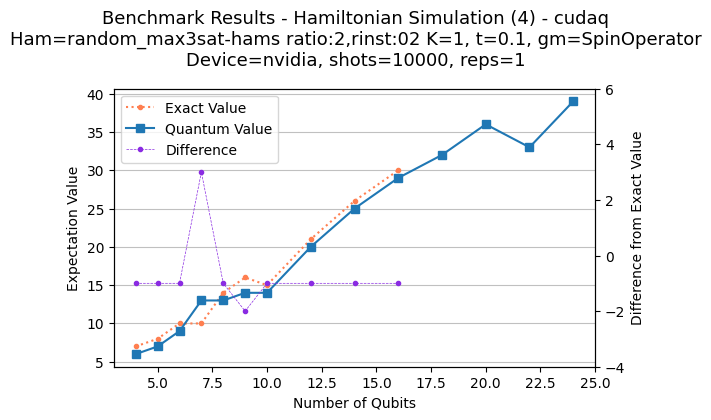

----- Expectation Time Plot -----


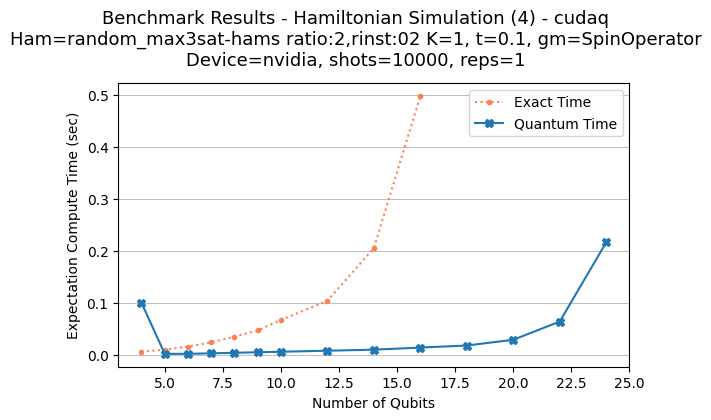

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - H2


Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = chemistry/electronic/standard/H2, {'ham_BK': ''}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:37 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 15
... quantum execution time = 0.071
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -1.5367
    ==> Simulation Quality: 2.863

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... number of terms in Hamiltonian = 62
... quantum execution time = 0.004
... exact computation time = 0.038 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -1.5102
    ==> Simulation Quality: 2.96

************
Execut

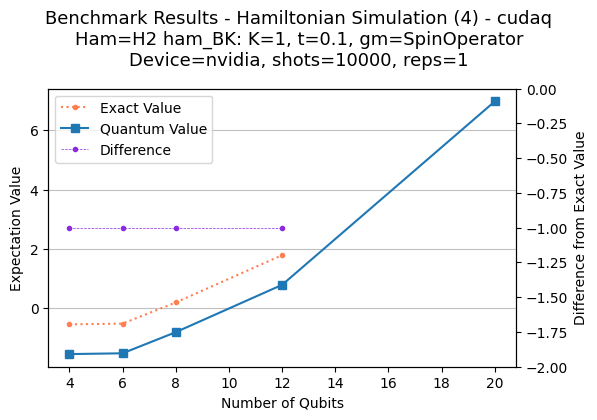

----- Expectation Time Plot -----


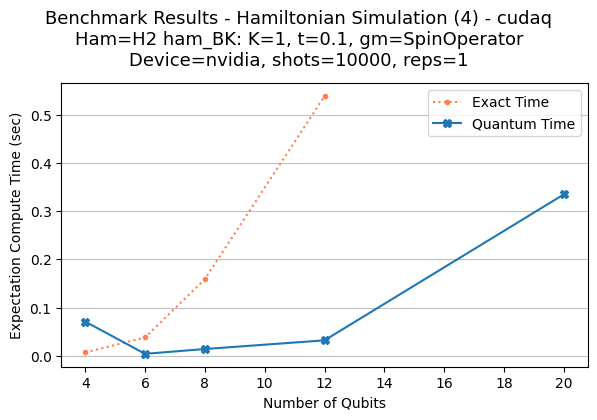

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Hamiltonian Simulation - LiH


Hamiltonian Simulation Benchmark Program - cudaq
... hamiltonian and params = chemistry/electronic/standard/LiH, {'ham_BK': ''}
... group_method = SpinOperator
... execution starting at Jan 25, 2026 20:14:39 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 27
... quantum execution time = 0.095
... exact computation time = 0.012 sec

    Exact expectation value, computed classically: -7.6831
    Estimated expectation value, from quantum algorithm: -8.6831
    ==> Simulation Quality: 1.13

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... number of terms in Hamiltonian = 105
... quantum execution time = 0.008
... exact computation time = 0.098 sec

    Exact expectation value, computed classically: -7.7889
    Estimated expectation value, from quantum algorithm: -8.7889
    ==> Simulation Quality: 1.128

************
Exec

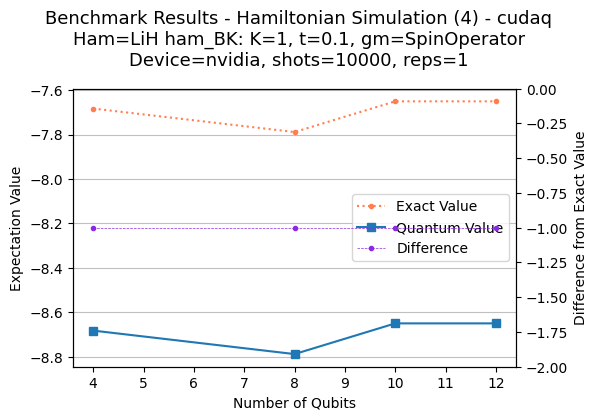

----- Expectation Time Plot -----


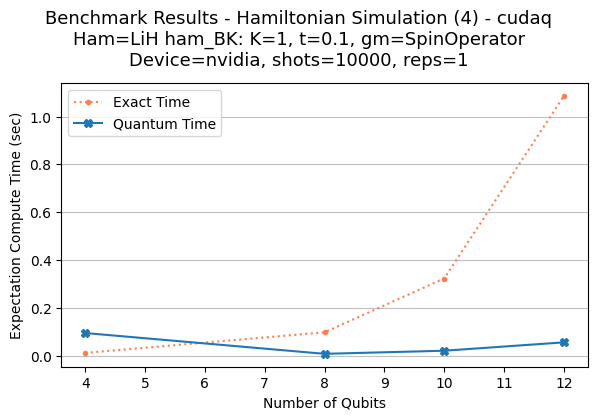

In [10]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/LiH'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(
            hamiltonian=hamiltonian_name, hamiltonian_params=hamiltonian_params,
            **app_args, **exec_args)


### Combined Benchmark Results

In [11]:
import cudaq
print(cudaq.__version__)

CUDA-Q Version amd64-cu12-0.13.0 (https://github.com/NVIDIA/cuda-quantum b66c5bb7fd8c08e5014e2f03e97e7b0e92691650)
